In [1]:
### TO explore what drives the sales?
### price/discount/attribute of product/Type/Sponsor/Page

# Data Pre_processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import qgrid
import seaborn as sns
import calendar
import plotly.graph_objects as go
import re
from sklearn import preprocessing
import plotly.express as px
import plotly
import math
from sklearn.model_selection import train_test_split

##### https://www.rsgsales.com/new-blog/wayfairsponsoredproducts 

### Merge Dataset

In [3]:
area_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Area_numeric_data.csv")
doormat_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Doormat_numeric_data.csv")
hallway_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Hallway_numeric_data.csv")
kids_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Kids_numeric_data.csv")
orient_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Orient_numeric_data.csv")
round_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\round_numeric_data.csv")
shag_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\shag_numeric_data.csv")

In [4]:
area_data['Type'] = 'Area'
doormat_data['Type'] = 'Doormat'
hallway_data['Type'] = 'Hallway'
kids_data['Type'] = 'Kids'
orient_data['Type'] = 'Orient'
round_data['Type'] = 'Round'
shag_data['Type'] = 'Shag'

In [5]:
frames = [area_data, doormat_data, hallway_data,kids_data,orient_data,round_data,shag_data]
final_data = pd.concat(frames)

In [6]:
final_data

web-scraper-order                              web-scraper-start-url  \
0     1570573103-4305  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...   
1     1570572560-4261  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...   
2     1570572662-4271  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...   
3     1570571392-4148  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...   
4     1570572353-4242  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...   
..                ...                                                ...   
232    1571756546-971  https://www.wayfair.com/rugs/sb0/shag-flokati-...   
233    1571756180-947  https://www.wayfair.com/rugs/sb0/shag-flokati-...   
234    1571755826-916  https://www.wayfair.com/rugs/sb0/shag-flokati-...   
235    1571756642-975  https://www.wayfair.com/rugs/sb0/shag-flokati-...   
236    1571756930-996  https://www.wayfair.com/rugs/sb0/shag-flokati-...   

                                             Product_C  \
0    Opens in a new tabQuickviewSave+11 SizesAvaila...   
1    Opens in a new tabSaleQuickviewSave+9 SizesAva...   
2    Opens in a new tabQuickviewSave+6 SizesAvailab...   
3    Opens in a new tabQuickviewSave+2 SizesAvailab...   
4    Opens in a new tabSaleQuickviewSave+24 SizesAv...   
..                                                 ...   
232  Opens in a new tabSaleQuickviewSave+11 SizesAv...   
233  Opens in a new tabSaleQuickviewSaveShag and fl...   
234  Opens in a new tabSaleQuickviewSave+4 SizesAva...   
235  Opens in a new tabSaleQuickviewSave+10 SizesAv...   
236  Opens in a new tabSaleQuickviewSave+6 SizesAva...   

                                        Product_C-href  \
0    https://www.wayfair.com/rugs/pdp/mercury-row-c...   
1    https://www.wayfair.com/rugs/pdp/andover-mills...   
2    https://www.wayfair.com/rugs/pdp/bungalow-rose...   
3    https://www.wayfair.com/rugs/pdp/three-posts-a...   
4    https://www.wayfair.com/rugs/pdp/mistana-tsuki...   
..                                                 ...   
232  https://www.wayfair.com/rugs/pdp/bungalow-rose...   
233  https://www.wayfair.com/rugs/pdp/glamour-home-...   
234  https://www.wayfair.com/rugs/pdp/ebern-designs...   
235  https://www.wayfair.com/rugs/pdp/viv-rae-ivory...   
236  https://www.wayfair.com/rugs/pdp/bungalow-rose...   

                                          Product_Name           Shop_Name  \
0                           Colona Shag White Area Rug         Mercury Row   
1                               Shiflett Gray Area Rug       Andover Mills   
2                         Fontanne Pink/White Area Rug       Bungalow Rose   
3                  Acton Ivory Indoor/Outdoor Area Rug         Three Posts   
4                              Tsukiji Orange Area Rug             Mistana   
..                                                 ...                 ...   
232             Cawley Hand-Knotted Wool Gray Area Rug       Bungalow Rose   
233     Shag and flokati Faux Sheepskin White Area Rug  Glamour Home Decor   
234  Lilia Handmade Shag and Flokati Wool Ivory Are...       Ebern Designs   
235                                     Ivory Area Rug           Viv + Rae   
236                             Vosburg Ivory Area Rug       Bungalow Rose   

    Sale_Price Original_Price Discount  \
0      $77.99        $180.00   57% Off   
1      $58.68        $199.99   71% Off   
2     $125.99        $315.00   60% Off   
3      $63.99        $163.14   61% Off   
4      $91.99        $365.70   75% Off   
..         ...            ...      ...   
232     $92.99        $324.00  71% Off   
233     $79.99         $90.00  11% Off   
234     $71.99        $135.00  47% Off   
235     $37.99         $97.02  61% Off   
236     $72.99        $194.00  62% Off   

                                           Description Collection  \
0    Tastefully tousled, this shag area rug showcas...  Area Rugs   
1    Warm-up hardwood and tiles floors while provid...  Area Rugs   
2    Soft to the touch and alluring with a disti

### Data Information

In [7]:
final_data.columns.tolist()

['web-scraper-order',
 'web-scraper-start-url',
 'Product_C',
 'Product_C-href',
 'Product_Name',
 'Shop_Name',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Description',
 'Collection',
 'Product_SKU',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating',
 'Sponsor_B',
 'Type']

In [8]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 236
Data columns (total 19 columns):
web-scraper-order        1603 non-null object
web-scraper-start-url    1603 non-null object
Product_C                1603 non-null object
Product_C-href           1603 non-null object
Product_Name             1600 non-null object
Shop_Name                1596 non-null object
Sale_Price               1596 non-null object
Original_Price           1358 non-null object
Discount                 1358 non-null object
Description              1453 non-null object
Collection               1600 non-null object
Product_SKU              1600 non-null object
Review_Numbers           1572 non-null object
Customer_Rating_Total    1525 non-null float64
Size_Rating              996 non-null float64
Material_Rating          996 non-null float64
Color_Rating             996 non-null float64
Sponsor_B                136 non-null object
Type                     1603 non-null object
dtypes: float64(4), 

### Data Cleaning

In [9]:
final_data.fillna(0, inplace=True)

final_data.drop(columns = ['web-scraper-order','Product_SKU','Collection'],inplace = True)

final_data = final_data[final_data['Product_Name']!=0]

#### Missing Values for Customer_Rating_Total

In [10]:
final_data.loc[final_data['Customer_Rating_Total'] == 0,'Customer_Rating_Total'] = 4.5

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Page

In [11]:
final_data['Page'] = final_data['web-scraper-start-url'].apply(lambda x: x[-1]).astype('category')

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Size_num

In [12]:
final_data['Product_C'] = final_data['Product_C'].str.findall('\d+').apply(lambda x: x[0])
final_data.rename(columns={'Product_C': "Size_num"},inplace = True)
final_data['Size_num'] = final_data['Size_num'].astype('float64')
final_data['Size_num'].loc[final_data['Size_num'] > 50] = 1

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

#### Discount

In [13]:
final_data['Discount'] = final_data['Discount'].str.findall('\d+')
final_data['Discount'] = final_data['Discount'].astype(str).str.replace('\[|\]|\'', '')
final_data['Discount'].replace('nan',0,inplace = True)
final_data['Discount'] = final_data['Discount'].astype('float64')

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

#### Sale_Price

In [14]:
final_data['Sale_Price'] = final_data['Sale_Price'].astype(str).str.replace('\$|\,|\'', '')
final_data['Sale_Price'] = final_data['Sale_Price'].astype('float64')

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Original_Price

In [15]:
final_data['Original_Price'] = final_data['Original_Price'].astype(str).str.replace('\$|\,|\'', '')
final_data['Original_Price'] = final_data['Original_Price'].astype('float64')

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Review_Numbers

In [16]:
final_data['Review_Numbers'] = final_data['Review_Numbers'].str.rsplit(' ').str[-2] 
final_data['Review_Numbers'] = final_data['Review_Numbers'].astype('float64')
final_data['Review_Numbers'].fillna(0, inplace=True)

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

#### Sponsor

In [17]:
final_data['Sponsor_B'].replace(0,'Non_Sponsored',inplace = True)
final_data.rename(columns = {'Sponsor_B':'Sponsor'},inplace = True)

## Final Dataset

In [18]:
final_data.head()

web-scraper-start-url  Size_num  \
0  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...      11.0   
1  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...       9.0   
2  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...       6.0   
3  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...       2.0   
4  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...      24.0   

                                      Product_C-href  \
0  https://www.wayfair.com/rugs/pdp/mercury-row-c...   
1  https://www.wayfair.com/rugs/pdp/andover-mills...   
2  https://www.wayfair.com/rugs/pdp/bungalow-rose...   
3  https://www.wayfair.com/rugs/pdp/three-posts-a...   
4  https://www.wayfair.com/rugs/pdp/mistana-tsuki...   

                          Product_Name      Shop_Name  Sale_Price  \
0           Colona Shag White Area Rug    Mercury Row       77.99   
1               Shiflett Gray Area Rug  Andover Mills       58.68   
2         Fontanne Pink/White Area Rug  Bungalow Rose      125.99   
3  Acton Ivory Indoor/Outdoor Area Rug    Three Posts       63.99   
4              Tsukiji Orange Area Rug        Mistana       91.99   

   Original_Price  Discount  \
0          180.00      57.0   
1          199.99      71.0   
2          315.00      60.0   
3          163.14      61.0   
4          365.70      75.0   

                                         Description  Review_Numbers  \
0  Tastefully tousled, this shag area rug showcas...          8574.0   
1  Warm-up hardwood and tiles floors while provid...          5180.0   
2  Soft to the touch and alluring with a distinct...          1417.0   
3  More than anything else, area rugs are art for...           607.0   
4  With bright tones and a distressed Persian-ins...         12136.0   

   Customer_Rating_Total  Size_Rating  Material_Rating  Color_Rating  \
0                    4.6          4.7              4.5           4.8   
1                    4.7          4.8              4.8           4.8   
2                    4.8          4.6              4.6           4.9   
3                    4.8          4.9              4.7           4.8   
4                    4.7          4.4              4.7           5.0   

         Sponsor  Type Page  
0  Non_Sponsored  Area    0  
1  Non_Sponsored  Area    3  
2  Non_Sponsored  Area    2  
3  Non_Sponsored  Area    5  
4  Non_Sponsored  Area    3

In [19]:
final_data.describe()

Size_num   Sale_Price  Original_Price     Discount  Review_Numbers  \
count  1600.000000  1600.000000     1600.000000  1600.000000     1600.000000   
mean     12.388125    67.860363      125.658569    37.624375     3310.350625   
std       9.139047    44.012848      132.361368    24.938038     7424.206676   
min       1.000000     0.000000        0.000000     0.000000        0.000000   
25%       5.000000    38.990000       42.990000    16.000000       42.000000   
50%      10.000000    55.990000       94.000000    39.000000      453.500000   
75%      18.000000    85.005000      169.000000    60.000000     2266.000000   
max      48.000000   392.990000     1701.000000    96.000000    34975.000000   

       Customer_Rating_Total  Size_Rating  Material_Rating  Color_Rating  
count            1600.000000  1600.000000      1600.000000   1600.000000  
mean                4.627750     2.856187         2.846188      2.830250  
std                 0.206686     2.253355         2.254451      2.246654  
min                 2.000000     0.000000         0.000000      0.000000  
25%                 4.500000     0.000000         0.000000      0.000000  
50%                 4.600000     4.400000         4.400000      4.400000  
75%                 4.700000     4.700000         4.725000      4.700000  
max                 5.000000     5.000000         5.000000      5.000000

In [20]:
final_data = final_data[['Product_Name',
 'Shop_Name',
 'Description',
 'Sponsor',
 'Type',
 'Product_C-href',
 'Page',
 'Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating']]

In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 236
Data columns (total 16 columns):
Product_Name             1600 non-null object
Shop_Name                1600 non-null object
Description              1600 non-null object
Sponsor                  1600 non-null object
Type                     1600 non-null object
Product_C-href           1600 non-null object
Page                     1600 non-null category
Size_num                 1600 non-null float64
Sale_Price               1600 non-null float64
Original_Price           1600 non-null float64
Discount                 1600 non-null float64
Review_Numbers           1600 non-null float64
Customer_Rating_Total    1600 non-null float64
Size_Rating              1600 non-null float64
Material_Rating          1600 non-null float64
Color_Rating             1600 non-null float64
dtypes: category(1), float64(9), object(6)
memory usage: 201.8+ KB


### Categorical Data

In [22]:
cat_data = final_data[['Shop_Name',
 'Sponsor',
 'Type']]

In [23]:
cat_data

Shop_Name        Sponsor  Type
0           Mercury Row  Non_Sponsored  Area
1         Andover Mills  Non_Sponsored  Area
2         Bungalow Rose  Non_Sponsored  Area
3           Three Posts  Non_Sponsored  Area
4               Mistana  Non_Sponsored  Area
..                  ...            ...   ...
232       Bungalow Rose  Non_Sponsored  Shag
233  Glamour Home Decor  Non_Sponsored  Shag
234       Ebern Designs  Non_Sponsored  Shag
235           Viv + Rae  Non_Sponsored  Shag
236       Bungalow Rose      Sponsored  Shag

[1600 rows x 3 columns]

### Numerical Data

In [24]:
num_data = final_data[['Page',
 'Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating']]

In [25]:
num_data.head()

Page  Size_num  Sale_Price  Original_Price  Discount  Review_Numbers  \
0    0      11.0       77.99          180.00      57.0          8574.0   
1    3       9.0       58.68          199.99      71.0          5180.0   
2    2       6.0      125.99          315.00      60.0          1417.0   
3    5       2.0       63.99          163.14      61.0           607.0   
4    3      24.0       91.99          365.70      75.0         12136.0   

   Customer_Rating_Total  Size_Rating  Material_Rating  Color_Rating  
0                    4.6          4.7              4.5           4.8  
1                    4.7          4.8              4.8           4.8  
2                    4.8          4.6              4.6           4.9  
3                    4.8          4.9              4.7           4.8  
4                    4.7          4.4              4.7           5.0

### Text Data

In [26]:
text_data = final_data[['Description','Product_Name']]
text_data

Description  \
0    Tastefully tousled, this shag area rug showcas...   
1    Warm-up hardwood and tiles floors while provid...   
2    Soft to the touch and alluring with a distinct...   
3    More than anything else, area rugs are art for...   
4    With bright tones and a distressed Persian-ins...   
..                                                 ...   
232                                                  0   
233  Wanting the luxury of sheep hide but not likin...   
234  This multi-textured shag area rug lends a retr...   
235  Ready to stand up to high foot traffic in the ...   
236                                                  0   

                                          Product_Name  
0                           Colona Shag White Area Rug  
1                               Shiflett Gray Area Rug  
2                         Fontanne Pink/White Area Rug  
3                  Acton Ivory Indoor/Outdoor Area Rug  
4                              Tsukiji Orange Area Rug  
..                                                 ...  
232             Cawley Hand-Knotted Wool Gray Area Rug  
233     Shag and flokati Faux Sheepskin White Area Rug  
234  Lilia Handmade Shag and Flokati Wool Ivory Are...  
235                                     Ivory Area Rug  
236                             Vosburg Ivory Area Rug  

[1600 rows x 2 columns]

### Features Engineering

#### Engineer Categorical Data

##### Sponsor

In [27]:
Sponsor = pd.get_dummies(final_data['Sponsor']).astype('int64')
Sponsor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 236
Data columns (total 2 columns):
Non_Sponsored    1600 non-null int64
Sponsored        1600 non-null int64
dtypes: int64(2)
memory usage: 37.5 KB


##### Type

In [28]:
Type = pd.get_dummies(final_data['Type']).astype('int64')
Type

Area  Doormat  Hallway  Kids  Orient  Round  Shag
0       1        0        0     0       0      0     0
1       1        0        0     0       0      0     0
2       1        0        0     0       0      0     0
3       1        0        0     0       0      0     0
4       1        0        0     0       0      0     0
..    ...      ...      ...   ...     ...    ...   ...
232     0        0        0     0       0      0     1
233     0        0        0     0       0      0     1
234     0        0        0     0       0      0     1
235     0        0        0     0       0      0     1
236     0        0        0     0       0      0     1

[1600 rows x 7 columns]

##### Shop_Name

In [29]:
Shop_Name = pd.get_dummies(final_data['Shop_Name']).astype('int64')
Shop_Name

0  17 Stories  A1 Home Collections LLC  Alcott Hill  Andover Mills  \
0    0           0                        0            0              0   
1    0           0                        0            0              1   
2    0           0                        0            0              0   
3    0           0                        0            0              0   
4    0           0                        0            0              0   
..  ..         ...                      ...          ...            ...   
232  0           0                        0            0              0   
233  0           0                        0            0              0   
234  0           0                        0            0              0   
235  0           0                        0            0              0   
236  0           0                        0            0              0   

     Astoria Grand  Attraction Design Home  August Grove  Bay Isle Home  \
0                0                       0             0              0   
1                0                       0             0              0   
2                0                       0             0              0   
3                0                       0             0              0   
4                0                       0             0              0   
..             ...                     ...           ...            ...   
232              0                       0             0              0   
233              0                       0             0              0   
234              0                       0             0              0   
235              0                       0             0              0   
236              0                       0             0              0   

     Bayou Breeze  ...  Wildkin  Wildon Home®  Willa Arlo Interiors  \
0               0  ...        0             0                     0   
1               0  ...        0             0                     0   
2               0  ...        0             0                     0   
3               0  ...        0             0                     0   
4               0  ...        0             0                     0   
..            ...  ...      ...           ...                   ...   
232             0  ...        0             0                     0   
233             0  ...        0             0                     0   
234             0  ...        0             0                     0   
235             0  ...        0             0                     0   
236             0  ...        0             0                     0   

     Williston Forge  Winston Porter  World Menagerie  Wrought Studio  \
0                  0               0                0               0   
1                  0               0                0               0   
2                  0               0                0               0   
3                  0               0                0               0   
4                  0               0                0               0   
..               ...             ...              ...             ...   
232                0               0                0               0   
233                0               0                0               0   
234                0               0                0               0   
235                0               0                0               0   
236                0               0                0               0   

     Zipcode Design  Zoomie Kids  iDesign  
0                 0            0        0  
1                 0            0        0  
2                 0            0        0  
3                 0            0        0  
4                 0            0        0  
..              ...          ...      ...  
232               0            0        0  
233               0            0        0  
234               0            0        0  
235               0            0 

#### Engineer Numerical Data

##### Sale Price

In [30]:
final_data['Sale_Price_Range'] = pd.qcut(final_data['Sale_Price'], 7)
final_data['Sale_Price_Range'].astype('str')

0        (62.99, 79.99]
1        (47.99, 62.99]
2      (107.99, 392.99]
3        (62.99, 79.99]
4       (79.99, 107.99]
             ...       
232     (79.99, 107.99]
233      (62.99, 79.99]
234      (62.99, 79.99]
235     (31.447, 40.99]
236      (62.99, 79.99]
Name: Sale_Price_Range, Length: 1600, dtype: object

In [31]:
Sale_Price_Dummy = pd.get_dummies(final_data['Sale_Price_Range'], sparse=True)
Sale_Price_Dummy

(-0.001, 31.447]  (31.447, 40.99]  (40.99, 47.99]  (47.99, 62.99]  \
0                   0                0               0               0   
1                   0                0               0               1   
2                   0                0               0               0   
3                   0                0               0               0   
4                   0                0               0               0   
..                ...              ...             ...             ...   
232                 0                0               0               0   
233                 0                0               0               0   
234                 0                0               0               0   
235                 0                1               0               0   
236                 0                0               0               0   

     (62.99, 79.99]  (79.99, 107.99]  (107.99, 392.99]  
0                 1                0                 0  
1                 0                0                 0  
2                 0                0                 1  
3                 1                0                 0  
4                 0                1                 0  
..              ...              ...               ...  
232               0                1                 0  
233               1                0                 0  
234               1                0                 0  
235               0                0                 0  
236               1                0                 0  

[1600 rows x 7 columns]

In [32]:
Sale_Price_Dummy.columns.tolist()

[Interval(-0.001, 31.447, closed='right'),
 Interval(31.447, 40.99, closed='right'),
 Interval(40.99, 47.99, closed='right'),
 Interval(47.99, 62.99, closed='right'),
 Interval(62.99, 79.99, closed='right'),
 Interval(79.99, 107.99, closed='right'),
 Interval(107.99, 392.99, closed='right')]

##### Original_Price

In [33]:
final_data['Original_Price_Range'] = pd.qcut(final_data['Original_Price'], 6)
final_data['Original_Price_Range'].astype('str')

0       (138.0, 219.0]
1       (138.0, 219.0]
2      (219.0, 1701.0]
3       (138.0, 219.0]
4      (219.0, 1701.0]
            ...       
232    (219.0, 1701.0]
233      (59.99, 94.0]
234      (94.0, 138.0]
235      (94.0, 138.0]
236     (138.0, 219.0]
Name: Original_Price_Range, Length: 1600, dtype: object

In [34]:
Original_Price_Dummy = pd.get_dummies(final_data['Original_Price_Range'], sparse=True)
Original_Price_Dummy

(-0.001, 25.495]  (25.495, 59.99]  (59.99, 94.0]  (94.0, 138.0]  \
0                   0                0              0              0   
1                   0                0              0              0   
2                   0                0              0              0   
3                   0                0              0              0   
4                   0                0              0              0   
..                ...              ...            ...            ...   
232                 0                0              0              0   
233                 0                0              1              0   
234                 0                0              0              1   
235                 0                0              0              1   
236                 0                0              0              0   

     (138.0, 219.0]  (219.0, 1701.0]  
0                 1                0  
1                 1                0  
2                 0                1  
3                 1                0  
4                 0                1  
..              ...              ...  
232               0                1  
233               0                0  
234               0                0  
235               0                0  
236               1                0  

[1600 rows x 6 columns]

##### Discount

In [35]:
final_data['Discount_Range'] = pd.qcut(final_data['Discount'], 6)
final_data['Discount_Range'].astype('str')

0      (54.0, 65.0]
1      (65.0, 96.0]
2      (54.0, 65.0]
3      (54.0, 65.0]
4      (65.0, 96.0]
           ...     
232    (65.0, 96.0]
233     (5.5, 24.0]
234    (39.0, 54.0]
235    (54.0, 65.0]
236    (54.0, 65.0]
Name: Discount_Range, Length: 1600, dtype: object

In [36]:
Discount_Dummy = pd.get_dummies(final_data['Discount_Range'], sparse=True)
Discount_Dummy

(-0.001, 5.5]  (5.5, 24.0]  (24.0, 39.0]  (39.0, 54.0]  (54.0, 65.0]  \
0                0            0             0             0             1   
1                0            0             0             0             0   
2                0            0             0             0             1   
3                0            0             0             0             1   
4                0            0             0             0             0   
..             ...          ...           ...           ...           ...   
232              0            0             0             0             0   
233              0            1             0             0             0   
234              0            0             0             1             0   
235              0            0             0             0             1   
236              0            0             0             0             1   

     (65.0, 96.0]  
0               0  
1               1  
2               0  
3               0  
4               1  
..            ...  
232             1  
233             0  
234             0  
235             0  
236             0  

[1600 rows x 6 columns]

##### Review_Numbers

In [37]:
final_data['Review_Range'] = pd.qcut(final_data['Review_Numbers'], 7)
final_data['Review_Range'].astype('str')

0       (5853.143, 34975.0]
1      (1835.571, 5853.143]
2       (768.143, 1835.571]
3        (248.286, 768.143]
4       (5853.143, 34975.0]
               ...         
232            (15.0, 62.0]
233            (15.0, 62.0]
234          (-0.001, 15.0]
235      (248.286, 768.143]
236          (-0.001, 15.0]
Name: Review_Range, Length: 1600, dtype: object

In [38]:
Review_Range_Dummy = pd.get_dummies(final_data['Review_Range'], sparse=True)
Review_Range_Dummy

(-0.001, 15.0]  (15.0, 62.0]  (62.0, 248.286]  (248.286, 768.143]  \
0                 0             0                0                   0   
1                 0             0                0                   0   
2                 0             0                0                   0   
3                 0             0                0                   1   
4                 0             0                0                   0   
..              ...           ...              ...                 ...   
232               0             1                0                   0   
233               0             1                0                   0   
234               1             0                0                   0   
235               0             0                0                   1   
236               1             0                0                   0   

     (768.143, 1835.571]  (1835.571, 5853.143]  (5853.143, 34975.0]  
0                      0                     0                    1  
1                      0                     1                    0  
2                      1                     0                    0  
3                      0                     0                    0  
4                      0                     0                    1  
..                   ...                   ...                  ...  
232                    0                     0                    0  
233                    0                     0                    0  
234                    0                     0                    0  
235                    0                     0                    0  
236                    0                     0                    0  

[1600 rows x 7 columns]

### Model Dataset

In [39]:
model_dataset_Dummy = pd.concat([Sponsor, Type,Shop_Name], axis=1, join_axes=[Sponsor.index])
model_dataset_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 236
Columns: 127 entries, Non_Sponsored to iDesign
dtypes: int64(127)
memory usage: 1.6 MB


C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [40]:
model_dataset = pd.concat([model_dataset_Dummy,final_data[['Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers']]], axis=1, join_axes=[Sponsor.index])

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [41]:
list(model_dataset.columns.values)

['Non_Sponsored',
 'Sponsored',
 'Area',
 'Doormat',
 'Hallway',
 'Kids',
 'Orient',
 'Round',
 'Shag',
 0,
 '17 Stories',
 'A1 Home Collections LLC',
 'Alcott Hill',
 'Andover Mills',
 'Astoria Grand',
 'Attraction Design Home',
 'August Grove',
 'Bay Isle Home',
 'Bayou Breeze',
 'Beachcrest Home',
 'Better Trends',
 'Birch Lane™ Heritage',
 'Bison',
 'Bloomsbury Market',
 'BoldBear®Brands',
 'Brayden Studio',
 'Breakwater Bay',
 'Bungalow Rose',
 'CPS',
 'Candice Olson Rugs',
 'Canora Grey',
 "Caroline's Treasures",
 'Charlton Home',
 'Chilewich',
 'Corrigan Studio',
 'CosmoLiving by Cosmopolitan',
 'Crayola LLC',
 'Darby Home Co',
 'Design by AKRO',
 'Disney',
 'ELLE Home',
 'East Urban Home',
 'Ebern Designs',
 'Eric Carle',
 'Everly Quinn',
 'Fleur De Lis Living',
 'Foundry Select',
 'Geo Crafts, Inc',
 'George Oliver',
 'Glamour Home Decor',
 'GloriaRug',
 'Gracie Oaks',
 'Greyleigh',
 'Grovelane Teen',
 'Harriet Bee',
 'Hashtag Home',
 'Highland Dunes',
 'Home & More',
 'Home F

# Data Exploratory Analytics

## Numerical Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027518C8E780>,
      dtype=object)

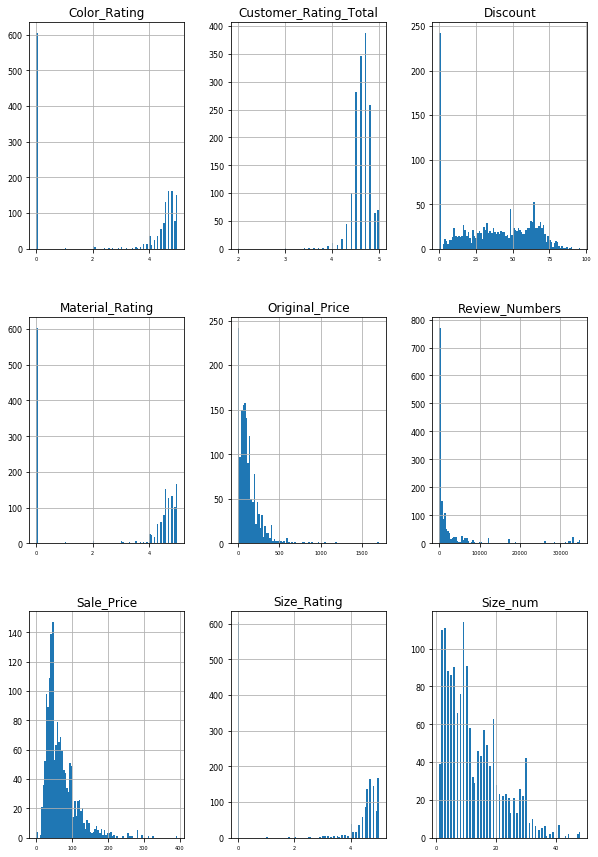

In [42]:
num_data.hist(figsize=(10, 15), bins=90, xlabelsize=5, ylabelsize=8)

## Correlation Analytics

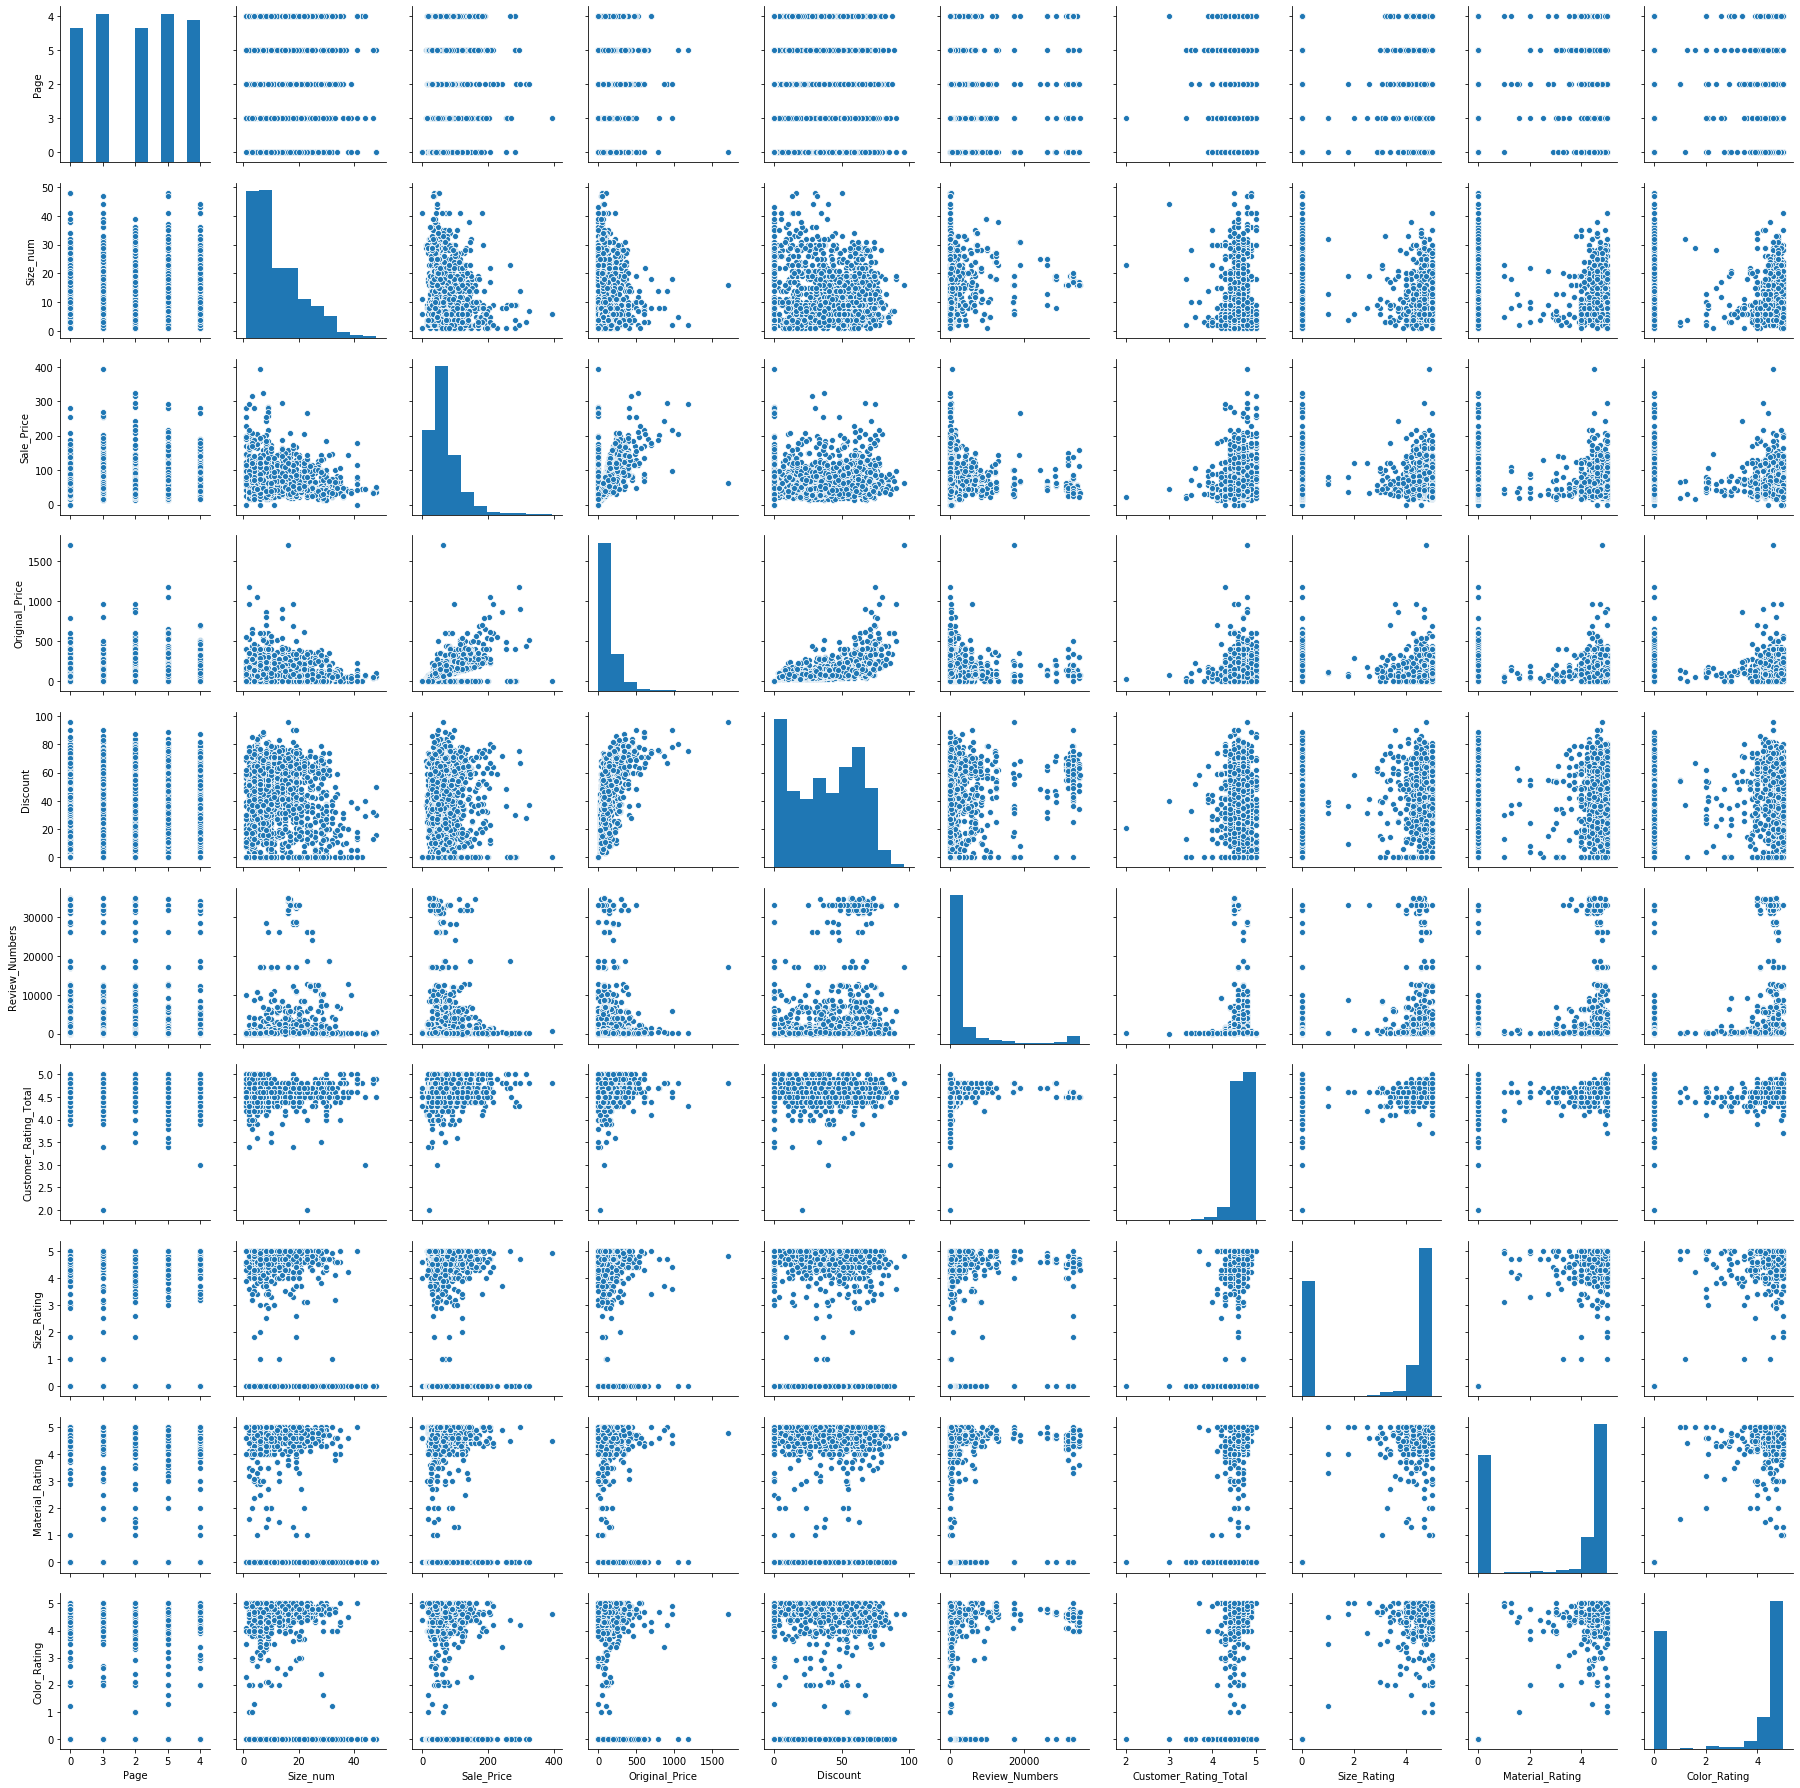

In [43]:
sns.pairplot(num_data)

In [44]:
num_data.corr()

Size_num  Sale_Price  Original_Price  Discount  \
Size_num               1.000000   -0.143127       -0.075228 -0.004749   
Sale_Price            -0.143127    1.000000        0.559016  0.052352   
Original_Price        -0.075228    0.559016        1.000000  0.648403   
Discount              -0.004749    0.052352        0.648403  1.000000   
Review_Numbers         0.232887   -0.083253        0.049973  0.222671   
Customer_Rating_Total -0.000375    0.131105        0.075023  0.011682   
Size_Rating            0.158383   -0.022596        0.155965  0.302653   
Material_Rating        0.161536   -0.014179        0.168428  0.309573   
Color_Rating           0.164080   -0.017501        0.165077  0.305868   

                       Review_Numbers  Customer_Rating_Total  Size_Rating  \
Size_num                     0.232887              -0.000375     0.158383   
Sale_Price                  -0.083253               0.131105    -0.022596   
Original_Price               0.049973               0.075023     0.155965   
Discount                     0.222671               0.011682     0.302653   
Review_Numbers               1.000000              -0.027547     0.252314   
Customer_Rating_Total       -0.027547               1.000000     0.068906   
Size_Rating                  0.252314               0.068906     1.000000   
Material_Rating              0.260307               0.075870     0.975692   
Color_Rating                 0.265053               0.080710     0.974331   

                       Material_Rating  Color_Rating  
Size_num                      0.161536      0.164080  
Sale_Price                   -0.014179     -0.017501  
Original_Price                0.168428      0.165077  
Discount                      0.309573      0.305868  
Review_Numbers                0.260307      0.265053  
Customer_Rating_Total         0.075870      0.080710  
Size_Rating                   0.975692      0.974331  
Material_Rating               1.000000      0.971224  
Color_Rating                  0.971224      1.000000

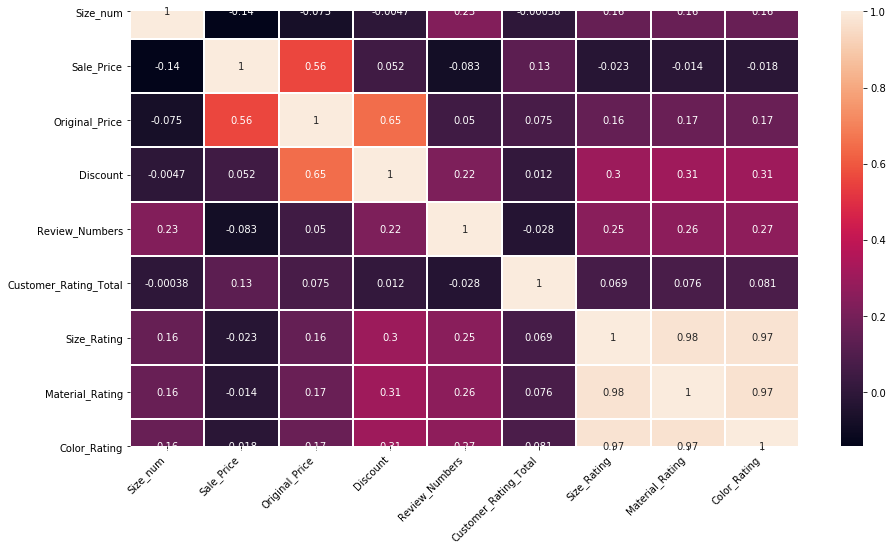

In [45]:
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(num_data.corr(), annot=True,  linewidths=1, ax=ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Explore Reveiw Data 

In [46]:
final_data.columns.tolist()

['Product_Name',
 'Shop_Name',
 'Description',
 'Sponsor',
 'Type',
 'Product_C-href',
 'Page',
 'Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating',
 'Sale_Price_Range',
 'Original_Price_Range',
 'Discount_Range',
 'Review_Range']

### Sponsored Products Analytics

In [47]:
fig = px.scatter(final_data, x='Sale_Price', y='Customer_Rating_Total', size='Review_Numbers', color='Sponsor',
                 hover_name='Product_Name', log_x=True, size_max=40)
fig.show()

https://www.rsgsales.com/new-blog/wayfairsponsoredproducts

In [48]:
# from this chart, we could observe that most of the product with more reviews appear in the range between 40$ and 180$,
# and all of these products rating by the customer arount 4.6.

In [ ]:
# for this part below is trying to understand the attributes for the product that we currently have
# that our competitors selected to sponsor

In [143]:
sponsor_product_dataset = final_data.loc[final_data['Sponsor'] == 'Sponsored']
sponsor_product_dataset.head()

Product_Name       Shop_Name  \
15                              Bismark Gray Area Rug      Wade Logan   
20                               Waloo Ivory Area Rug  Winston Porter   
28  Marcial Chindi Hand-Knotted Cotton Navy Blue A...   Bungalow Rose   
33                                     Clair Area Rug         Mistana   
34                             Wawona Yellow Area Rug  Winston Porter   

                                          Description    Sponsor  Type  \
15  Polypropylene rugs are both elegant and easy t...  Sponsored  Area   
20  Cozy up with their softest area rug yet! Equal...  Sponsored  Area   
28  This gorgeous, multicolored rug features one-o...  Sponsored  Area   
33  Ready to stand up to high foot traffic in the ...  Sponsored  Area   
34  Cozy up with their softest area rug yet! Equal...  Sponsored  Area   

                                       Product_C-href Page  Size_num  \
15  https://www.wayfair.com/rugs/pdp/wade-logan-bi...    0      20.0   
20  https://www.wayfair.com/rugs/pdp/winston-porte...    4      21.0   
28  https://www.wayfair.com/rugs/pdp/bungalow-rose...    4      12.0   
33  https://www.wayfair.com/rugs/pdp/mistana-clair...    0      19.0   
34  https://www.wayfair.com/rugs/pdp/winston-porte...    4      21.0   

    Sale_Price  Original_Price  Discount  Review_Numbers  \
15       72.99            0.00       0.0          5726.0   
20       54.99           73.99      26.0           386.0   
28       79.99            0.00       0.0            21.0   
33       82.99          259.00      68.0         28356.0   
34       48.99           70.99      31.0           382.0   

    Customer_Rating_Total  Size_Rating  Material_Rating  Color_Rating  \
15                    4.5          4.5              4.6           4.6   
20                    4.4          3.7              5.0           5.0   
28                    4.6          0.0              0.0           0.0   
33                    4.8          4.7              4.7           4.7   
34                    4.4          0.0              0.0           0.0   

   Sale_Price_Range Original_Price_Range Discount_Range          Review_Range  
15   (62.99, 79.99]     (-0.001, 25.495]  (-0.001, 5.5]  (1835.571, 5853.143]  
20   (47.99, 62.99]        (59.99, 94.0]   (24.0, 39.0]    (248.286, 768.143]  
28   (62.99, 79.99]     (-0.001, 25.495]  (-0.001, 5.5]          (15.0, 62.0]  
33  (79.99, 107.99]      (219.0, 1701.0]   (65.0, 96.0]   (5853.143, 34975.0]  
34   (47.99, 62.99]        (59.99, 94.0]   (24.0, 39.0]    (248.286, 768.143]

In [174]:
# Shop_Name
Shop_Name = pd.DataFrame(sponsor_product_dataset['Shop_Name'].value_counts()).reset_index()
Shop_Name.rename(columns = {'index':'Shop_Name','Shop_Name':'Count'},inplace = True)

wind = Shop_Name
fig = px.bar_polar(wind, r="Count", theta="Shop_Name", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [181]:
# Type
Type = pd.DataFrame(sponsor_product_dataset['Type'].value_counts()).reset_index()
Type.rename(columns = {'index':'Type','Type':'Count'},inplace = True)

wind = Type
fig = px.bar_polar(wind, r="Count", theta="Type", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [190]:
# Page
Page = pd.DataFrame(sponsor_product_dataset['Page'].value_counts()).reset_index()
Page.rename(columns = {'index':'Page','Page':'Count'},inplace = True)
Page['Page'].astype('str')


wind = Page
fig = px.bar_polar(wind, r="Count", theta="Page", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [177]:
# Discount_Range
Discount_Range = pd.DataFrame(sponsor_product_dataset['Discount_Range'].value_counts()).reset_index()
Discount_Range.rename(columns = {'index':'Discount_Range','Discount_Range':'Count'},inplace = True)

wind = Discount_Range
fig = px.bar_polar(wind, r="Count", theta="Discount_Range", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

TypeError: Object of type Interval is not JSON serializable

In [178]:
# Size_num
Size_num = pd.DataFrame(sponsor_product_dataset['Size_num'].value_counts()).reset_index()
Size_num.rename(columns = {'index':'Size_num','Size_num':'Count'},inplace = True)

wind = Size_num
fig = px.bar_polar(wind, r="Count", theta="Size_num", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [179]:
# Sale_Price_Range
Sale_Price_Range = pd.DataFrame(sponsor_product_dataset['Sale_Price_Range'].value_counts()).reset_index()
Sale_Price_Range.rename(columns = {'index':'Sale_Price_Range','Sale_Price_Range':'Count'},inplace = True)

wind = Sale_Price_Range
fig = px.bar_polar(wind, r="Count", theta="Sale_Price_Range", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

TypeError: Object of type Interval is not JSON serializable

In [ ]:
.dtypes
c

### Page/Type/Reviews Analytics

In [50]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='0']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='0']['Type'],
    name='Page 1',
    marker_color='maroon'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='2']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='2']['Type'],
    name='Page 2',
    marker_color='lightgoldenrodyellow'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='3']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='3']['Type'],
    name='Page 3',
    marker_color='lightskyblue'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='4']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='4']['Type'],
    name='Page 4',
    marker_color='mediumseagreen'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='5']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='5']['Type'],
    name='Page 5',
    marker_color='orangered'
))


fig.update_layout(
    xaxis=dict(title='Review_Numbers', zeroline=False),
    boxmode='group',
    autosize=False,
    width=800,
    height=900
)

fig.update_traces(orientation='h')
fig.show()

In [51]:
# observe that higher page have more reveiws
# Customer preper to purchase Round/Orient/Area rugs in the Wayfair

### Page/Type/Rating Analytics

In [52]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='0']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='0']['Type'],
    name='Page 1',
    marker_color='maroon'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='2']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='2']['Type'],
    name='Page 2',
    marker_color='lightgoldenrodyellow'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='3']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='3']['Type'],
    name='Page 3',
    marker_color='lightskyblue'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='4']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='4']['Type'],
    name='Page 4',
    marker_color='mediumseagreen'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='5']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='5']['Type'],
    name='Page 5',
    marker_color='orangered'
))


fig.update_layout(
    xaxis=dict(title='Customer_Rating_Total', zeroline=False),
    boxmode='group',
    autosize=False,
    width=800,
    height=900
)

fig.update_traces(orientation='h') 
fig.show()

### Type/Review Number/Sales/Discount

In [53]:
fig = px.scatter_3d(final_data, x='Discount', y='Sale_Price', z='Review_Numbers',
              color='Type', opacity=0.4)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### Shop Name Analytics

In [54]:
fig = px.bar(final_data, x='Shop_Name', y='Customer_Rating_Total',height=800, width=1500).update_xaxes(categoryorder = 'total ascending')
fig.show()

In [55]:
fig = px.bar(final_data, x='Shop_Name', y='Review_Numbers',height=800, width=1500).update_xaxes(categoryorder = 'total ascending')
fig.show()

### Sale_Price Analytics

[Text(0, 0, '(-0.001, 31.447]'),
 Text(0, 0, '(31.447, 40.99]'),
 Text(0, 0, '(40.99, 47.99]'),
 Text(0, 0, '(47.99, 62.99]'),
 Text(0, 0, '(62.99, 79.99]'),
 Text(0, 0, '(79.99, 107.99]'),
 Text(0, 0, '(107.99, 392.99]')]

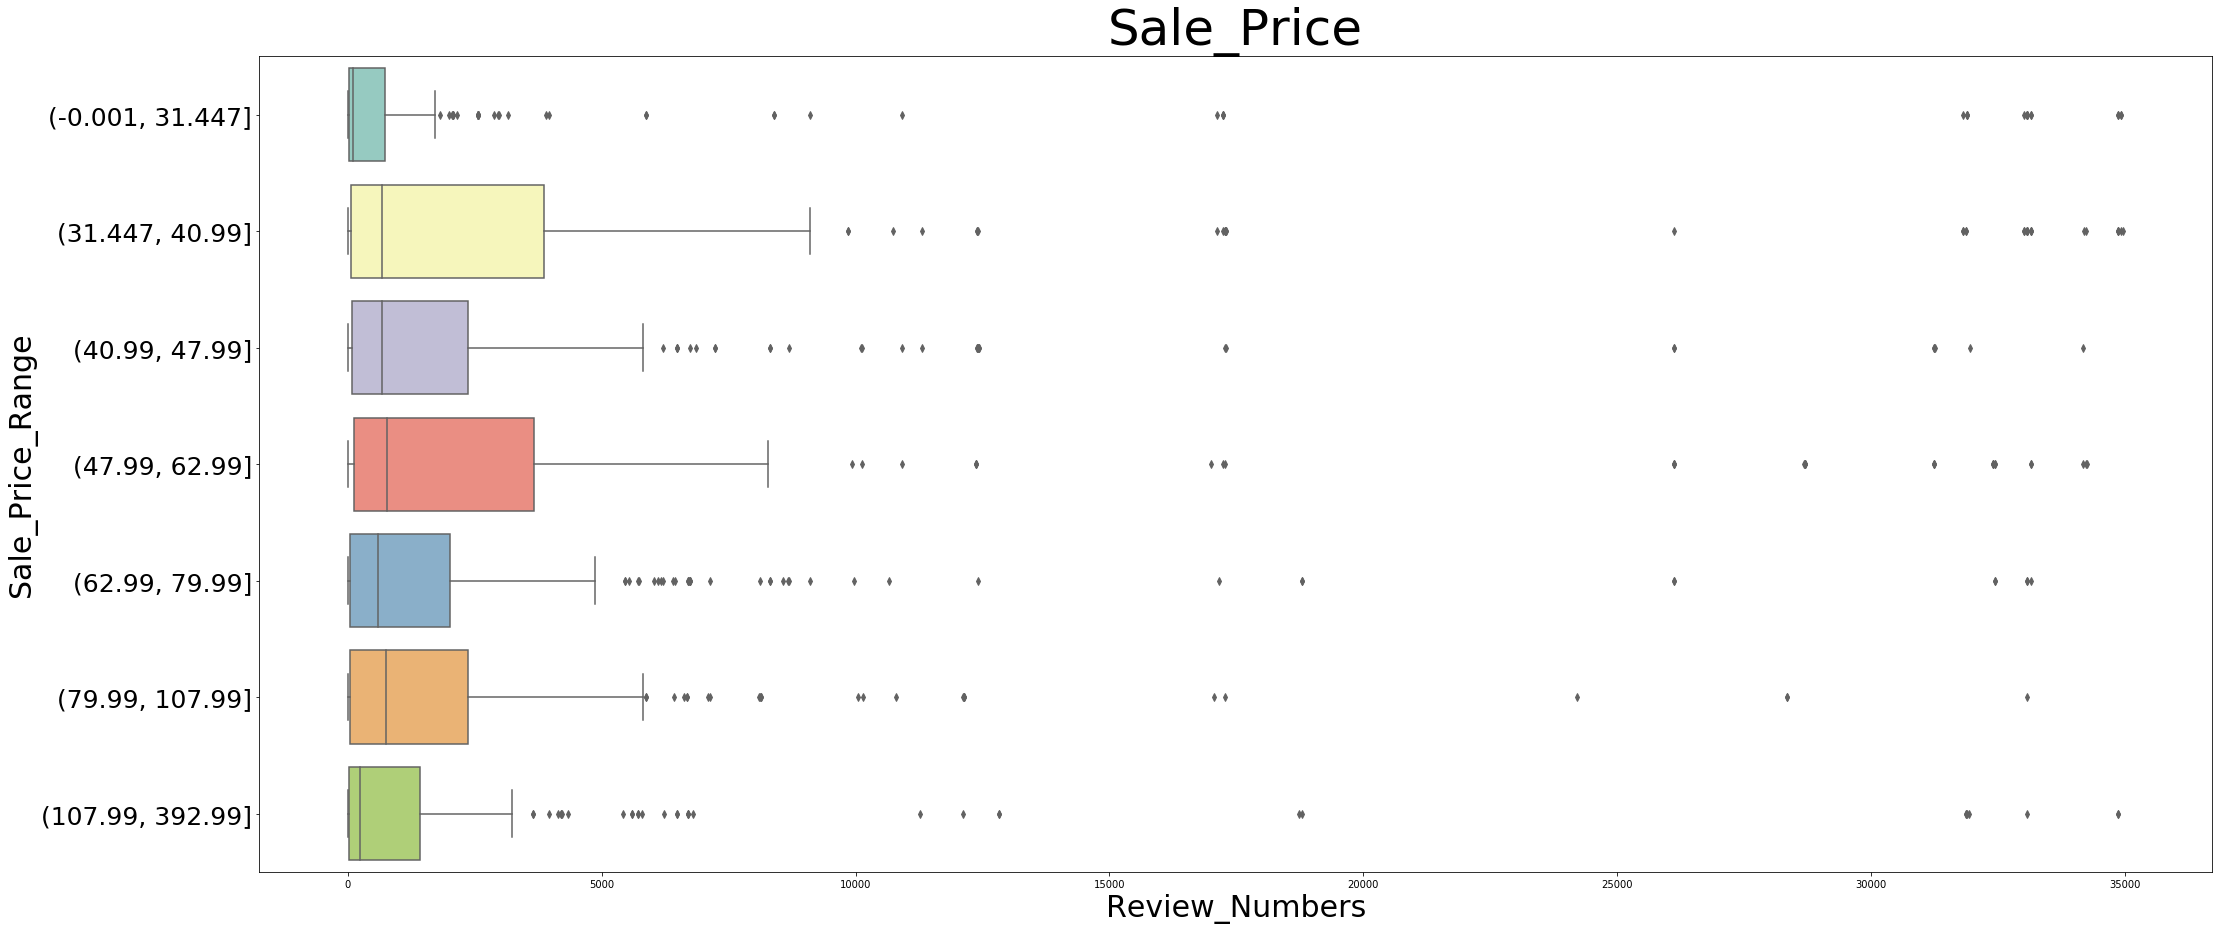

In [56]:
plt.figure(figsize=(35,15))
b=sns.boxplot(x='Review_Numbers', y='Sale_Price_Range', palette="Set3", data=final_data)
b.axes.set_title("Sale_Price",fontsize=50)
b.set_xlabel("Review_Numbers",fontsize=30)
b.set_ylabel("Sale_Price_Range",fontsize=30)
b.set_yticklabels(b.get_yticklabels(),fontsize = 25)

### Discount Analytics

In [57]:
pd.Series(final_data['Sale_Price_Range']).describe

<bound method NDFrame.describe of 0        (62.99, 79.99]
1        (47.99, 62.99]
2      (107.99, 392.99]
3        (62.99, 79.99]
4       (79.99, 107.99]
             ...       
232     (79.99, 107.99]
233      (62.99, 79.99]
234      (62.99, 79.99]
235     (31.447, 40.99]
236      (62.99, 79.99]
Name: Sale_Price_Range, Length: 1600, dtype: category
Categories (7, interval[float64]): [(-0.001, 31.447] < (31.447, 40.99] < (40.99, 47.99] < (47.99, 62.99] < (62.99, 79.99] < (79.99, 107.99] < (107.99, 392.99]]>

[Text(0, 0, '(-0.001, 5.5]'),
 Text(0, 0, '(5.5, 24.0]'),
 Text(0, 0, '(24.0, 39.0]'),
 Text(0, 0, '(39.0, 54.0]'),
 Text(0, 0, '(54.0, 65.0]'),
 Text(0, 0, '(65.0, 96.0]')]

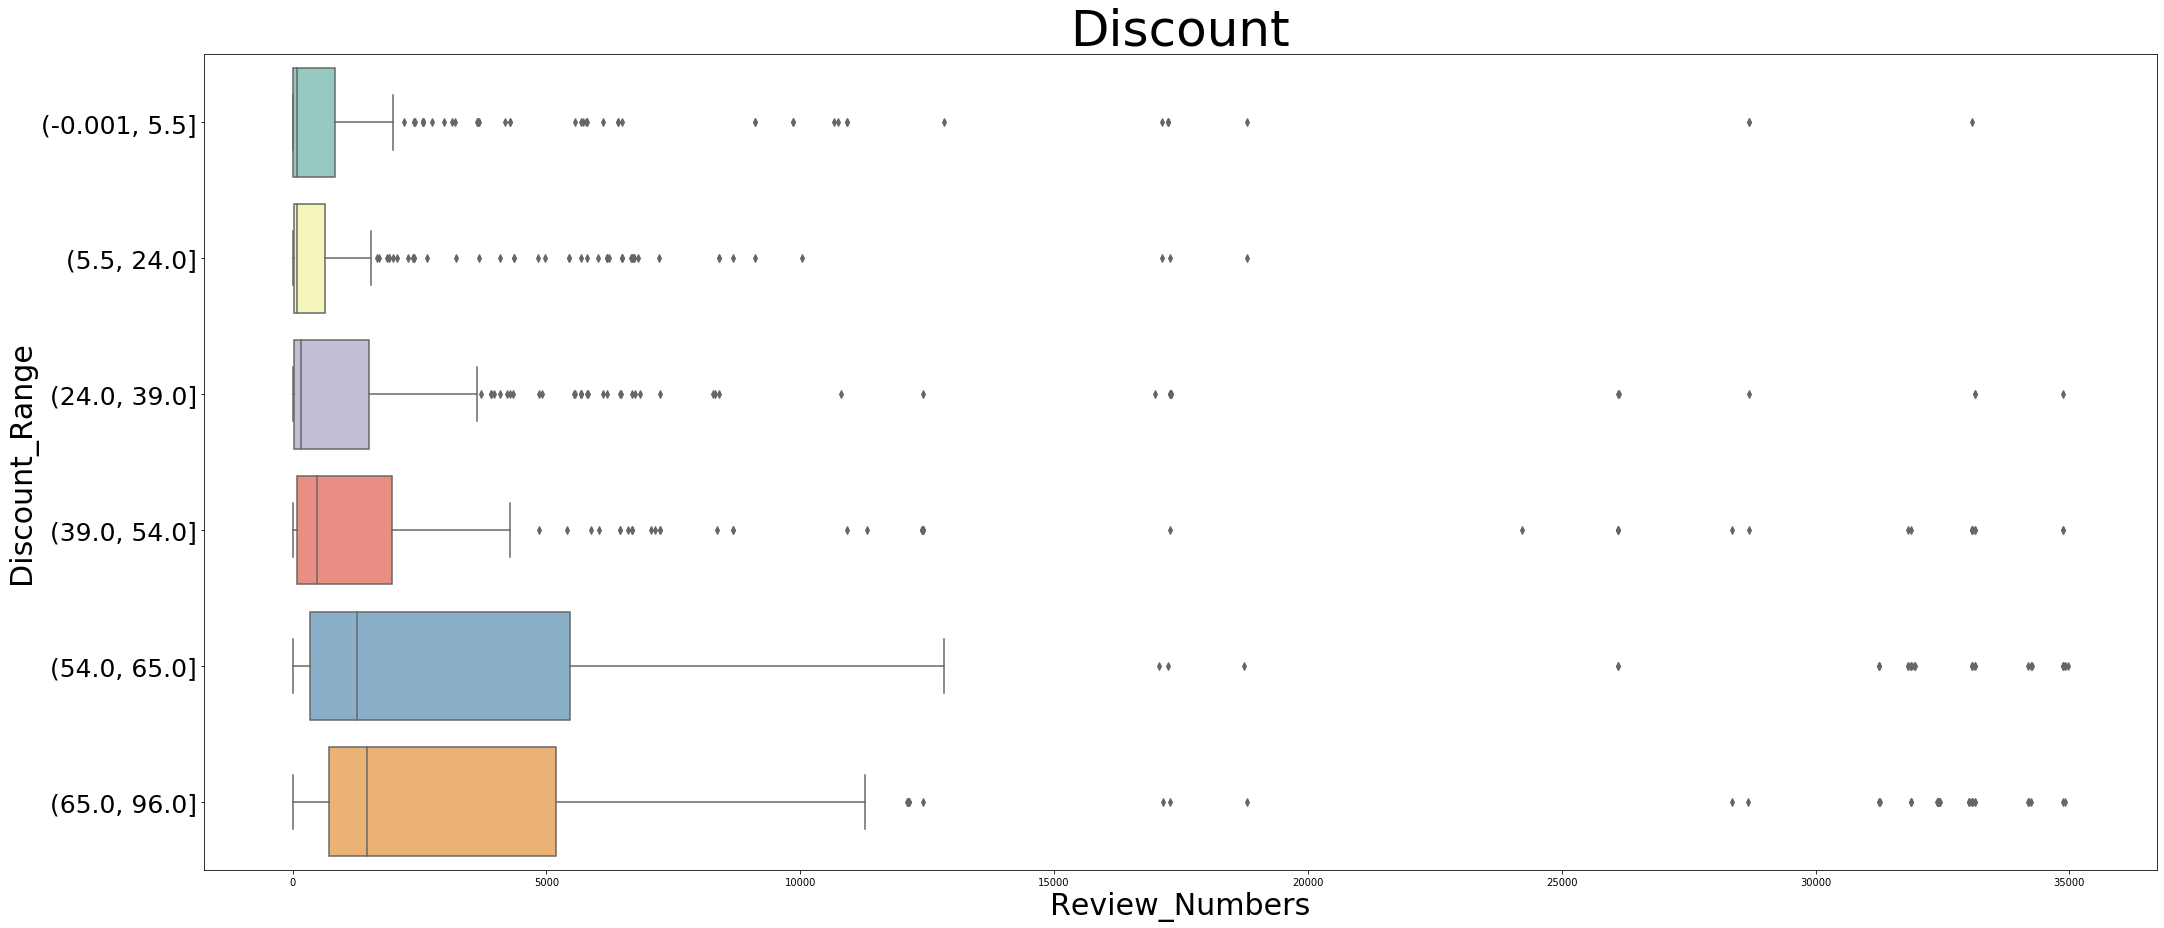

In [58]:
plt.figure(figsize=(35,15))
b=sns.boxplot(x='Review_Numbers', y='Discount_Range', palette="Set3", data=final_data)
b.axes.set_title("Discount",fontsize=50)
b.set_xlabel("Review_Numbers",fontsize=30)
b.set_ylabel("Discount_Range",fontsize=30)
b.set_yticklabels(b.get_yticklabels(),fontsize = 25)

### Size_num 

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

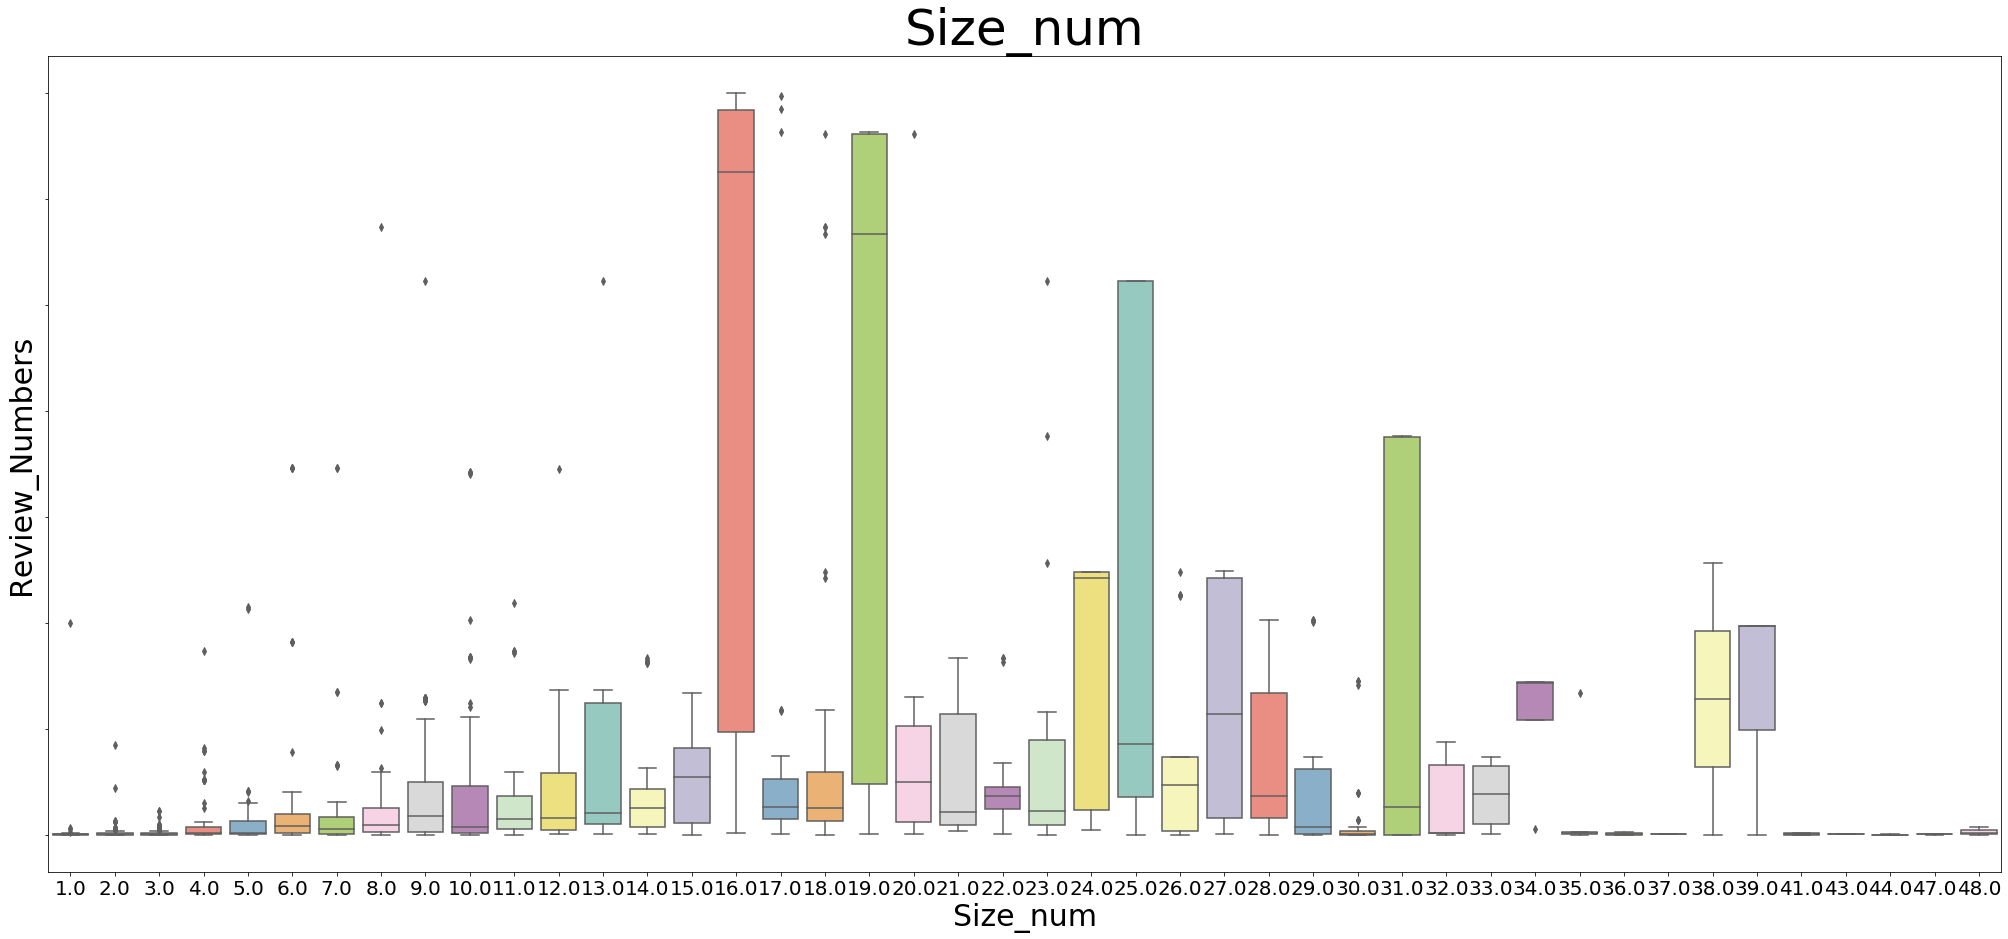

In [59]:
plt.figure(figsize=(35,15))
b=sns.boxplot(x='Size_num', y='Review_Numbers', palette="Set3", data=final_data)
b.axes.set_title("Size_num",fontsize=50)
b.set_xlabel("Size_num",fontsize=30)
b.set_ylabel("Review_Numbers",fontsize=30)
b.set_xticklabels(b.get_xticklabels(),fontsize = 20)
b.set_yticklabels(b.get_yticklabels(),fontsize = 20)

In [60]:
final_data.loc[final_data['Size_num'] == 3][['Type','Review_Numbers']]

Type  Review_Numbers
47   Area             0.0
54   Area             7.0
91   Area          1124.0
163  Area           306.0
185  Area           423.0
..    ...             ...
155  Shag             0.0
177  Shag           277.0
182  Shag             6.0
183  Shag             0.0
199  Shag            33.0

[111 rows x 2 columns]

###### 以上結論可以再深入挖掘，比如看到了sponsored的產品比較少，review也比較小，看這些是什麽產品，爲什麽review會比較少

# Text Analytics

## Product Description

### value keywords with higher values

In [61]:
import nltk
import string
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer         

In [62]:
text_classification_data  = final_data[['Description','Review_Numbers']]

In [63]:
#lower the case
text_classification_data['Description'] = text_classification_data['Description'].str.lower()
text_classification_data['Description'].fillna(value = 'N/A',inplace =True)
#tokenization
text_classification_data['Description'] = text_classification_data.apply(lambda row: nltk.word_tokenize(row["Description"]), axis=1)
#filter out stopwords
stops = set(stopwords.words("english")) 
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [item for item in x if item not in stops])
#remove punctuation
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [item for item in x if item not in string.punctuation])
#Stemming
stemmer = SnowballStemmer("english")
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [stemmer.stem(y) for y in x])
#Lemitization
lemmatizer = WordNetLemmatizer() 
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
#Extract words from list for each row
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: ','.join(x))

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [64]:
text_classification_data.reset_index(inplace = True)
text_classification_data.columns.tolist()
text_classification_data

index                                        Description  Review_Numbers
0         0  tast,tousl,shag,area,rug,showcas,geometr,diamo...          8574.0
1         1  warm-up,hardwood,tile,floor,provid,stylish,acc...          5180.0
2         2  soft,touch,allur,distinct,high-low,textur,rayo...          1417.0
3         3  anyth,el,area,rug,art,floor,creat,mood,decor,g...           607.0
4         4  bright,tone,distress,persian-inspir,pattern,ar...         12136.0
...     ...                                                ...             ...
1595    232                                                n/a            20.0
1596    233  want,luxuri,sheep,hide,like,anim,product,faux,...            54.0
1597    234  multi-textur,shag,area,rug,lend,retro,vibe,mod...             9.0
1598    235  readi,stand,high,foot,traffic,entryway,take,oc...           284.0
1599    236                                                n/a             9.0

[1600 rows x 3 columns]

In [65]:
keywords = pd.DataFrame(text_classification_data['Description'].str.split(',',expand=True).stack().reset_index(level = 1,drop=True).rename('keywords'))
keywords.reset_index(inplace = True)
keywords

index keywords
0          0     tast
1          0    tousl
2          0     shag
3          0     area
4          0      rug
...      ...      ...
64226   1598      hue
64227   1598   yellow
64228   1598      red
64229   1598     blue
64230   1599      n/a

[64231 rows x 2 columns]

In [66]:
keyword_2 = keywords.merge(text_classification_data.drop(columns = 'Description'), how = 'left',left_on = 'index',right_index =True).drop(columns = ['index_x','index_y'])
keyword_2

keywords  Review_Numbers
0         tast          8574.0
1        tousl          8574.0
2         shag          8574.0
3         area          8574.0
4          rug          8574.0
...        ...             ...
64226      hue           284.0
64227   yellow           284.0
64228      red           284.0
64229     blue           284.0
64230      n/a             9.0

[64231 rows x 2 columns]

In [67]:
keyword_2['len'] = keyword_2.keywords.apply(lambda x: len(str(x)))
keyword_2

keywords  Review_Numbers  len
0         tast          8574.0    4
1        tousl          8574.0    5
2         shag          8574.0    4
3         area          8574.0    4
4          rug          8574.0    3
...        ...             ...  ...
64226      hue           284.0    3
64227   yellow           284.0    6
64228      red           284.0    3
64229     blue           284.0    4
64230      n/a             9.0    3

[64231 rows x 3 columns]

In [68]:
#filter out digital values
keyword_3 = keyword_2.loc[keyword_2['keywords'].str.contains('\d', regex=True) == False]

In [69]:
#groupby keywords
keywords_final = keyword_3.loc[keyword_3['len'] >2].groupby('keywords').agg({'Review_Numbers':['mean', 'count']})
keywords_final

Review_Numbers      
                   mean count
keywords                     
...           62.000000     2
abaca        122.000000     1
abbrevi        4.000000     3
abc           75.375000     8
abil          22.000000     2
...                 ...   ...
zesti         51.000000     1
zigzag       412.500000     2
zone         195.000000     1
zoo           79.333333     3
zoomi         37.714286     7

[3005 rows x 2 columns]

In [70]:
#rename column name
keywords_final.columns = keywords_final.columns.get_level_values(0)
keywords_final.columns = ['Review_Numbers_Mean','Review_Numbers_Count']
keywords_final.reset_index(inplace = True)
keywords_final

keywords  Review_Numbers_Mean  Review_Numbers_Count
0         ...            62.000000                     2
1       abaca           122.000000                     1
2     abbrevi             4.000000                     3
3         abc            75.375000                     8
4        abil            22.000000                     2
...       ...                  ...                   ...
3000    zesti            51.000000                     1
3001   zigzag           412.500000                     2
3002     zone           195.000000                     1
3003      zoo            79.333333                     3
3004    zoomi            37.714286                     7

[3005 rows x 3 columns]

In [71]:
#tfidf value for each keyword
keywords_final['Log_value'] = keywords_final['Review_Numbers_Mean']*np.log(3005/keywords_final['Review_Numbers_Count'])

In [72]:
#Top 20 valuable keywords
keywords_final.sort_values(by=['Log_value','Review_Numbers_Count'], ascending=False).head(60)

keywords  Review_Numbers_Mean  Review_Numbers_Count  \
1272                    hot         33147.000000                     1   
1702                mustard         33147.000000                     1   
1901              periwinkl         33081.000000                     1   
135                  aspect         34675.000000                     3   
821                    envi         32746.500000                     2   
884                extravag         32746.500000                     2   
417                  cherri         32743.500000                     2   
197           bazaar-worthi         34661.333333                     3   
2131               reminisc         34661.333333                     3   
441                   clash         33104.000000                     3   
1486                  lilah         32866.333333                     3   
2686                  to-th         26113.000000                     1   
959                     fix         31616.400000                     5   
116                area-rug         26113.000000                     2   
2918            well-travel         26180.500000                     4   
2093                  recal         26121.250000                     4   
2645             terracotta         26334.800000                     5   
555                   count         21837.666667                     3   
1561               magnific         21834.333333                     3   
827             erased-weav         24784.142857                     7   
260                   bliss         17300.000000                     1   
1062                 garnet         17300.000000                     1   
1793              onslaught         17300.000000                     1   
2122                  releg         17300.000000                     1   
759                    echo         17243.000000                     1   
1040                  fulli         17243.000000                     1   
334                   burst         23677.615385                    13   
1841              oversatur         17556.000000                     2   
2220                  sandi         16578.000000                     2   
2214                  salem         17081.000000                     3   
2493               standout         17081.000000                     3   
1835                 overdi         17527.600000                     5   
2856                  visit         16374.750000                     4   
1482       lightly-distress         16838.800000                     5   
1540              low-traff         16208.600000                     5   
1586                   mask         12832.000000                     1   
2651           texture-rich         12832.000000                     1   
202                    bead         12417.000000                     1   
752          eastern-inspir         12417.000000                     1   
1030            freshly-cut         12417.000000                     1   
1095                glimmer         12417.000000                     1   
1599                   meal         12417.000000                     1   
1942               placemat         12417.000000                     1   
2486  stain-and-fade-resist         12417.000000                     1   
322               brushless         13145.000000                     2   
600                 current         16687.000000                    11   
946                    fill         14871.000000                     7   
1606                 medley         12267.500000                     2   
964                   flank         10912.000000                     1   
1407                   knit         10912.000000                     1   
1612                mercuri         10912.000000                     1   
1037                fuchsia         12301.666667                     3   
2970                   worn         13558.000000                     6   
71                     

### Words Cloud

In [73]:
from wordcloud import WordCloud

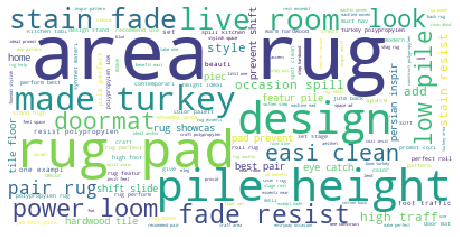

In [74]:
# Start with one review:
text = ' '.join(text_classification_data['Description'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Model Building

In [75]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

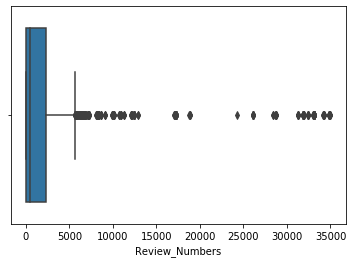

In [76]:
sns.boxplot(text_classification_data['Review_Numbers'])

In [77]:
text_classification_data.describe()

index  Review_Numbers
count  1600.000000     1600.000000
mean    114.126875     3310.350625
std      66.357350     7424.206676
min       0.000000        0.000000
25%      57.000000       42.000000
50%     114.000000      453.500000
75%     171.000000     2266.000000
max     236.000000    34975.000000

In [78]:
text_classification_data.columns.tolist()

['index', 'Description', 'Review_Numbers']

In [79]:
def f(row):
    if row['Review_Numbers'] <= 453.5:
        val = 'Weak'
    elif row['Review_Numbers'] <= 2266:
        val = 'Neutral'
    else:
        val = 'Good'
    return val

In [80]:
text_classification_data['label'] = text_classification_data.apply(f, axis=1)

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
text_classification_data['label'].value_counts()

Weak       800
Neutral    403
Good       397
Name: label, dtype: int64

In [82]:
#split the dataset
sentences = text_classification_data['Description'].values
y = text_classification_data['label'].values
train_x, valid_x, train_y, valid_y = train_test_split(sentences, y, test_size=0.3)

In [83]:
encoder = preprocessing.LabelEncoder()
integerMapping=dict(zip(valid_y,encoder.fit_transform(valid_y)))
integerMapping

{'Weak': 2, 'Neutral': 1, 'Good': 0}

In [84]:
# label encode the target variable 
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [85]:
# create a count vectorizer object 
count_vect = CountVectorizer()
count_vect.fit(text_classification_data['Description'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [86]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(text_classification_data['Description'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(text_classification_data['Description'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(text_classification_data['Description'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [87]:
# def function for multilabel confustion_matrix
from sklearn.metrics import multilabel_confusion_matrix
def multiple_matrix(predictions,valida_y):
    mcm = multilabel_confusion_matrix(predictions, valida_y)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    precision = tp/(tp+fp)
    return precision  

In [88]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return multiple_matrix(predictions, valid_y)

In [89]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  [0.6640625  0.51304348 0.78481013]
NB, WordLevel TF-IDF:  [0.5703125  0.40869565 0.83122363]
NB, N-Gram Vectors:  [0.6328125  0.48695652 0.85654008]
NB, CharLevel Vectors:  [0.4375     0.26956522 0.89451477]


In [90]:
# Deploy NB, Count Vectors which have the accuracy performance as our final model to identify the
# product description is good or not in the short future

In [91]:
# Final Model
clf1 = naive_bayes.MultinomialNB()
clf1.fit(xtrain_count, train_y)
# Apply the Model in the future
clf1.predict(#data)

SyntaxError: unexpected EOF while parsing (<ipython-input-91-d3a56acb23e5>, line 5)

# Product Name

## Product Description

### value keywords with higher values

In [92]:
import nltk
import string
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer         

In [93]:
text_classification_data_Name  = final_data[['Product_Name','Review_Numbers']]

In [94]:
#lower the case
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].str.lower()
text_classification_data_Name['Product_Name'].fillna(value = 'N/A',inplace =True)
#tokenization
text_classification_data_Name['Product_Name'] = text_classification_data_Name.apply(lambda row: nltk.word_tokenize(row["Product_Name"]), axis=1)
#filter out stopwords
stops = set(stopwords.words("english")) 
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [item for item in x if item not in stops])
#remove punctuation
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [item for item in x if item not in string.punctuation])
#Stemming
stemmer = SnowballStemmer("english")
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [stemmer.stem(y) for y in x])
#Lemitization
lemmatizer = WordNetLemmatizer() 
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
#Extract words from list for each row
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: ','.join(x))

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [95]:
text_classification_data_Name.reset_index(inplace = True)
text_classification_data_Name.columns.tolist()
text_classification_data_Name

index                                    Product_Name  Review_Numbers
0         0                      colona,shag,white,area,rug          8574.0
1         1                          shiflett,gray,area,rug          5180.0
2         2                      fontann,pink/whit,area,rug          1417.0
3         3             acton,ivori,indoor/outdoor,area,rug           607.0
4         4                          tsukiji,orang,area,rug         12136.0
...     ...                                             ...             ...
1595    232             cawley,hand-knot,wool,gray,area,rug            20.0
1596    233      shag,flokati,faux,sheepskin,white,area,rug            54.0
1597    234  lilia,handmad,shag,flokati,wool,ivori,area,rug             9.0
1598    235                                  ivori,area,rug           284.0
1599    236                          vosburg,ivori,area,rug             9.0

[1600 rows x 3 columns]

In [96]:
keywords = pd.DataFrame(text_classification_data_Name['Product_Name'].str.split(',',expand=True).stack().reset_index(level = 1,drop=True).rename('keywords'))
keywords.reset_index(inplace = True)
keywords

index keywords
0         0   colona
1         0     shag
2         0    white
3         0     area
4         0      rug
...     ...      ...
8637   1598      rug
8638   1599  vosburg
8639   1599    ivori
8640   1599     area
8641   1599      rug

[8642 rows x 2 columns]

In [97]:
keyword_2 = keywords.merge(text_classification_data_Name.drop(columns = 'Product_Name'), how = 'left',left_on = 'index',right_index =True).drop(columns = ['index_x','index_y'])
keyword_2

keywords  Review_Numbers
0      colona          8574.0
1        shag          8574.0
2       white          8574.0
3        area          8574.0
4         rug          8574.0
...       ...             ...
8637      rug           284.0
8638  vosburg             9.0
8639    ivori             9.0
8640     area             9.0
8641      rug             9.0

[8642 rows x 2 columns]

In [98]:
keyword_2['len'] = keyword_2.keywords.apply(lambda x: len(str(x)))
keyword_2

keywords  Review_Numbers  len
0      colona          8574.0    6
1        shag          8574.0    4
2       white          8574.0    5
3        area          8574.0    4
4         rug          8574.0    3
...       ...             ...  ...
8637      rug           284.0    3
8638  vosburg             9.0    7
8639    ivori             9.0    5
8640     area             9.0    4
8641      rug             9.0    3

[8642 rows x 3 columns]

In [99]:
#filter out digital values
keyword_3 = keyword_2.loc[keyword_2['keywords'].str.contains('\d', regex=True) == False]

In [100]:
#groupby keywords
keywords_final = keyword_3.loc[keyword_3['len'] >2].groupby('keywords').agg({'Review_Numbers':['mean', 'count']})
keywords_final

Review_Numbers      
                   mean count
keywords                     
aaliyah        3.000000     1
aaron       1405.200000     5
abagail       61.000000     1
abbevill    1540.666667    21
abbey         23.000000     1
...                 ...   ...
zigzagg       45.000000     1
zlatkus       24.000000     1
zoo           62.666667     3
zosia        300.000000     2
zuniga      1166.000000     2

[1563 rows x 2 columns]

In [101]:
#rename column name
keywords_final.columns = keywords_final.columns.get_level_values(0)
keywords_final.columns = ['Review_Numbers_Mean','Review_Numbers_Count']
keywords_final.reset_index(inplace = True)
keywords_final

keywords  Review_Numbers_Mean  Review_Numbers_Count
0      aaliyah             3.000000                     1
1        aaron          1405.200000                     5
2      abagail            61.000000                     1
3     abbevill          1540.666667                    21
4        abbey            23.000000                     1
...        ...                  ...                   ...
1558   zigzagg            45.000000                     1
1559   zlatkus            24.000000                     1
1560       zoo            62.666667                     3
1561     zosia           300.000000                     2
1562    zuniga          1166.000000                     2

[1563 rows x 3 columns]

In [102]:
#tfidf value for each keyword
keywords_final['Log_value'] = keywords_final['Review_Numbers_Mean']*np.log(3005/keywords_final['Review_Numbers_Count'])

In [103]:
#Top 20 valuable keywords
keywords_final.sort_values(by=['Log_value','Review_Numbers_Count'], ascending=False).head(30)

keywords  Review_Numbers_Mean  Review_Numbers_Count  \
288              caberi         33147.000000                     1   
338          chelmsford         33081.000000                     1   
1111          periwinkl         33081.000000                     1   
1099             paulin         33075.000000                     1   
1252              sandi         33075.000000                     1   
535            falmouth         32746.500000                     2   
342              cherri         32743.500000                     2   
219            blue/tan         34661.333333                     3   
100             ashanti         28674.000000                     1   
621             graphit         32855.000000                     3   
268         brown/brown         31675.000000                     3   
266   brown/beige/ivori         31674.666667                     3   
1168         rabinowitz         32915.500000                     4   
1223              rowen         26131.000000                     1   
90                ariel         26113.000000                     1   
874               lilac         26113.000000                     1   
61              angelin         32989.500000                     6   
377            colorway         25161.500000                     2   
1412           thaddeus         25161.500000                     2   
949            mckeehan         26113.000000                     3   
357               clair         28584.000000                     6   
875               lilah         32935.176471                    17   
1256            sapphir         21870.666667                     3   
300             cannock         18801.000000                     1   
1455     turquoise/gray         21526.333333                     3   
981             montana         17303.000000                     1   
1063      orange/navy/t         17303.000000                     1   
1062  orange/navy/purpl         17300.000000                     1   
626           gray/aqua         17282.000000                     1   
1162           purple/t         17280.000000                     1   

          Log_value  
288   265442.264778  
338   264913.734611  
1111  264913.734611  
1099  264865.686414  
1252  264865.686414  
535   239536.903475  
342   239514.958818  
219   239489.729111  
100   229622.333854  
621   227009.012443  
268   218855.896184  
266   218853.593044  
1168  217957.833131  
1223  209257.906324  
90    209113.761733  
874   209113.761733  
61    205071.750595  
377   184053.495695  
1412  184053.495695  
949   180425.699039  
357   177685.958229  
875   170433.593532  
1256  151113.633890  
300   150559.025556  
1455  148734.490078  
981   138562.992351  
1063  138562.992351  
1062  138538.968253  
626   138394.823661  
1162  138378.807596

### Words Cloud

In [104]:
from wordcloud import WordCloud

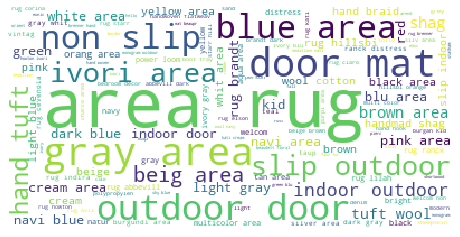

In [105]:
# Start with one review:
text = ' '.join(text_classification_data_Name['Product_Name'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Model Building

In [106]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

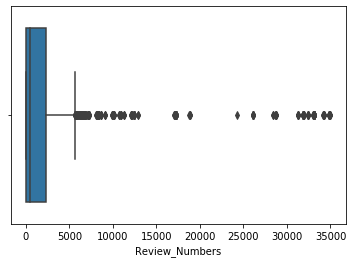

In [107]:
sns.boxplot(text_classification_data['Review_Numbers'])

In [108]:
text_classification_data_Name.describe()

index  Review_Numbers
count  1600.000000     1600.000000
mean    114.126875     3310.350625
std      66.357350     7424.206676
min       0.000000        0.000000
25%      57.000000       42.000000
50%     114.000000      453.500000
75%     171.000000     2266.000000
max     236.000000    34975.000000

In [109]:
text_classification_data.columns.tolist()

['index', 'Description', 'Review_Numbers', 'label']

In [110]:
def f(row):
    if row['Review_Numbers'] <= 453.5:
        val = 'Weak'
    elif row['Review_Numbers'] <= 2266:
        val = 'Neutral'
    else:
        val = 'Good'
    return val

In [111]:
text_classification_data_Name['label'] = text_classification_data_Name.apply(f, axis=1)

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
text_classification_data_Name['label'].value_counts()

Weak       800
Neutral    403
Good       397
Name: label, dtype: int64

In [113]:
#split the dataset
sentences = text_classification_data_Name['Product_Name'].values
y = text_classification_data_Name['label'].values
train_x, valid_x, train_y, valid_y = train_test_split(sentences, y, test_size=0.3)

In [114]:
encoder = preprocessing.LabelEncoder()
integerMapping=dict(zip(valid_y,encoder.fit_transform(valid_y)))
integerMapping

{'Good': 0, 'Weak': 2, 'Neutral': 1}

In [115]:
# label encode the target variable 
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [116]:
# create a count vectorizer object 
count_vect = CountVectorizer()
count_vect.fit(text_classification_data_Name['Product_Name'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [117]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(text_classification_data_Name['Product_Name'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(text_classification_data_Name['Product_Name'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(text_classification_data_Name['Product_Name'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [118]:
# def function for multilabel confustion_matrix
from sklearn.metrics import multilabel_confusion_matrix
def multiple_matrix(predictions,valida_y):
    mcm = multilabel_confusion_matrix(predictions, valida_y)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    precision = tp/(tp+fp)
    return precision  

In [119]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return multiple_matrix(predictions, valid_y)

In [120]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  [0.78070175 0.54887218 0.72532189]
NB, WordLevel TF-IDF:  [0.65789474 0.36842105 0.96566524]
NB, N-Gram Vectors:  [0.5877193  0.41353383 0.9527897 ]
NB, CharLevel Vectors:  [0.51754386 0.16541353 0.94849785]


In [121]:
# Deploy NB, Count Vectors which have the accuracy performance as our final model to identify the
# product description is good or not in the short future

In [122]:
# Final Model
clf2 = naive_bayes.MultinomialNB()
clf2.fit(xtrain_count, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
#Export Model
from joblib import dump, load
dump(clf2, 'Product_Name_Model.joblib') 

['Product_Name_Model.joblib']

In [124]:
#Load Model
clf2 = load('Product_Name_Model.joblib') 

# Models

## Features Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# load data
dataset = model_dataset.drop(columns = 0 )
# split data into X and y
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [ ]:
keywords_final.columns = ['keywords','Review_Numbers_Mean','Review_Numbers_Count']
keywords_final

In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X,y)

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores.loc[feature_scores > 0.03].index.tolist()

## Building Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))